#### SARSAMAX and ET is implemented using new efficient algorithm

In [1]:
from math import log10
from math import log2
import time

In [2]:
from graphics import *
import random
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

#### create 5x5 Grid world

In [3]:
win = GraphWin("My Window", 600,600)
win.setBackground(color_rgb(255,255,255))

In [4]:
def line(x1,y1,x2,y2):
    """
    create a line between pt(x1,y1) and pt(x2,y2) and return it
    """
    ln = Line(Point(x1,y1),Point(x2,y2))
    ln.setOutline(color_rgb(0,0,0))
    ln.setWidth(2)
    
    return ln

In [5]:
#border lines
border1 = line(50,50,550,50)
border1.draw(win)

border2 = line(550,50,550,550)
border2.draw(win)

border3 = line(50,550,550,550)
border3.draw(win)

border4 = line(50,50,50,550)
border4.draw(win)

#lines horizontal
ln1 = line(50,150,550,150)
ln1.draw(win)

ln2 = line(50,250,550,250)
ln2.draw(win)

ln3 = line(50,350,550,350)
ln3.draw(win)

ln4 = line(50,450,550,450)
ln4.draw(win)

#lines vertical

lnv1 = line(150,50,150,550)
lnv1.draw(win)

lnv2 = line(250,50,250,550)
lnv2.draw(win)

lnv3 = line(350,50,350,550)
lnv3.draw(win)

lnv4 = line(450,50,450,550)
lnv4.draw(win)

#create goal, obstacle and hole

rect_goal = Rectangle(Point(450,50), Point(550,150))
rect_goal.setFill(color_rgb(0,255,0))
rect_goal.draw(win)

rect_hole = Rectangle(Point(450,150), Point(550,250))
rect_hole.setFill(color_rgb(255,0,0))
rect_hole.draw(win)

rect_obs1 = Rectangle(Point(150,350), Point(250,450))
rect_obs1.setFill(color_rgb(0,0,0))
rect_obs1.draw(win)

rect_obs2 = Rectangle(Point(150,250), Point(250,350))
rect_obs2.setFill(color_rgb(0,0,0))
rect_obs2.draw(win)

Rectangle(Point(150.0, 250.0), Point(250.0, 350.0))

#### Create agent look like circle

In [6]:
agent = Circle(Point(100,500), 25)
agent.setFill(color_rgb(0,0,255))
agent.draw(win)

Circle(Point(100.0, 500.0), 25)

In [7]:
def up(agent):
    val = agent.getCenter()
    
    if (val.getY()) == 100 or (val.getY() == 500 and val.getX() == 200) :
        pass
    else :
        agent.move(0,-100)
        
    
def down(agent):
    val = agent.getCenter()
    
    if val.getY() == 500 or (val.getX() == 200 and val.getY() == 200):
        pass
    else :
        agent.move(0,100)

def right(agent):
    val = agent.getCenter()
    
    if val.getX() == 500 or (val.getX() == 100 and (val.getY() == 300 or val.getY() == 400)):
        pass
    else :
        agent.move(100,0)

def left(agent):
    val = agent.getCenter()
    
    if val.getX() == 100 or (val.getX() == 300 and (val.getY() == 300 or val.getY() == 400)):
        pass
    else:
        agent.move(-100,0)
        
def action(agent,val):
    if val == 0:
        up(agent)
    elif val == 1:
        down(agent)
    elif val == 2:
        right(agent)
    else :
        left(agent)

#### Reward for agent in the each state

In [8]:
reward = np.array([[-1,-1,-1,-1,-1],
                   [-1,-20,-1,-1,-1],
                   [-1,-20,-1,-1,-1],
                   [-1,-1,-1,-1,-100],
                   [-1,-1,-1,-1,-1]])

In [9]:
def rewards(agent):
    val = agent.getCenter()
    i = int(val.getX() / 100) - 1
    j = int((500 - val.getY()) / 100) 
    
    
    return reward[j][i]

def observation(agent):
    val = agent.getCenter()
    i = int(val.getX() / 100) - 1
    j = int((500 - val.getY()) / 100) 
    
    return [i,j]

def env_close():
    win.close()

def reset(agent):
    agent.move(-400,400)

def set_agent(agent,obs):
    pos = agent.getCenter()
    
    pos = [pos.getX(), pos.getY()]
    
    refer_pos = [(obs[0]+1) * 100, (500 - (obs[1]*100))]
    
    
    agent.move(refer_pos[0]-pos[0], refer_pos[1] - pos[1])

#### Create the value function and policy

In [10]:
Q = np.zeros([5,5,4])
E = np.zeros([5,5,4])

In [11]:
Q[4,4] = [100.,100.,100.,100.]

#### Declare the variable

In [12]:
episode = 500
max_episode_length = 500
learning_rate = .03
discount_factor = 0.9
lambda_return = 0.5
episode_without_ET = []

#### Q learning without using Eligibility Trace

In [13]:
start_time = time.time()
for j in range(episode):  
    epsilon = 1 / (log10(j+1)+.01)
    
    S = observation(agent)
    A = np.argmax(Q[S[0],S[1]])
    
    for i in range(max_episode_length):
        action(agent,A)
        
        R = rewards(agent)
        
        S_new = observation(agent)
        
        p = random.uniform(0,1)
        
        if p > epsilon:
            A_new = np.argmax(Q[S_new[0],S_new[1]])
        else :
            A_new = np.random.choice([0,1,2,3])
        
        #add probability to each action
        if A_new == 0:
            A_new = np.random.choice([0,1,2,3],p=[0.8,0,0.1,0.1])
        elif A_new == 1:
            A_new = np.random.choice([0,1,2,3],p=[0,0.8,0.1,0.1])
        elif A_new == 2:
            A_new = np.random.choice([0,1,2,3],p=[0.1,0.1,0.8,0])
        elif A_new == 3:
            A_new = np.random.choice([0,1,2,3],p=[0.1,0.1,0, 0.8])
            
       
        #temporal difference learning
        Q[S[0],S[1],A] = Q[S[0],S[1],A] + (learning_rate * (R + (discount_factor * np.max(Q[S_new[0],S_new[1]])) - Q[S[0],S[1],A]))
        
        S = S_new
        A = A_new
        
        if (S[0] == 4) and (S[1] == 4):
            reset(agent)
            S = observation(agent)
            A = np.argmax(Q[S[0],S[1]])
            episode_without_ET.append(i)
            break
print("--- %s seconds ---" % (time.time() - start_time))       

--- 21.235871076583862 seconds ---


#### Q Learning using Eligibility traces

In [17]:
Q = np.zeros([5,5,4])
E = np.zeros([5,5,4])
Q[4,4] = [100.,100.,100.,100.]
episode_with_ET = []

In [18]:
start_time = time.time()
for j in range(episode):  
    epsilon = 1 / (log10(j+1)+.1)
    
    S = observation(agent)
    A = np.argmax(Q[S[0],S[1]])
    
    for i in range(max_episode_length):
        action(agent,A)
        
        R = rewards(agent)
        
        S_new = observation(agent)
        
        p = random.uniform(0,1)
        
        if p > epsilon:
            A_new = np.argmax(Q[S_new[0],S_new[1]])
        else :
            A_new = np.random.choice([0,1,2,3])
        
        #add probability to each action
        if A_new == 0:
            A_new = np.random.choice([0,1,2,3],p=[0.8,0,0.1,0.1])
        elif A_new == 1:
            A_new = np.random.choice([0,1,2,3],p=[0,0.8,0.1,0.1])
        elif A_new == 2:
            A_new = np.random.choice([0,1,2,3],p=[0.1,0.1,0.8,0])
        elif A_new == 3:
            A_new = np.random.choice([0,1,2,3],p=[0.1,0.1,0, 0.8])
            
       
        #temporal difference learning using eligiblity traces
        
        TD_error = R + (discount_factor * np.max(Q[S_new[0],S_new[1]])) - Q[S[0],S[1],A]
        E[S[0],S[1],A] = E[S[0],S[1],A] + 1
        
       
        Q = Q + (learning_rate * TD_error )* E
        E = (discount_factor * lambda_return) * E 
 
        S = S_new
        A = A_new
        
        if (S[0] == 4) and (S[1] == 4):
            reset(agent)
            S = observation(agent)
            A = np.argmax(Q[S[0],S[1]])
            episode_with_ET.append(i)
            E = np.zeros([5,5,4])
            break
print("--- %s seconds ---" % (time.time() - start_time))      

--- 20.227845907211304 seconds ---


#### How much episode takes to win the game without Eligibility Trace

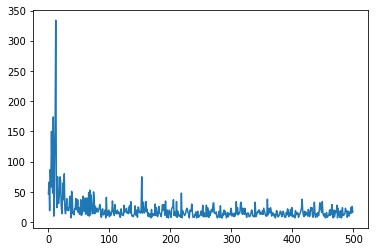

In [14]:
plt.plot(episode_without_ET)
plt.show()

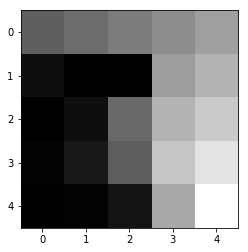

In [15]:
Q_new = np.zeros([5,5])

for i in range(5):
    for j in range(5):
        Q_new[i,j] = np.max(Q[i,j])
        
plt.imshow(Q_new,cmap='gray')
plt.show()

#### How much episodes takes to win the game with Eligibility Traces

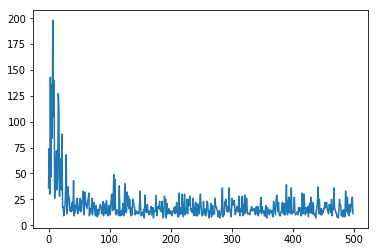

In [19]:
plt.plot(episode_with_ET)
plt.show()

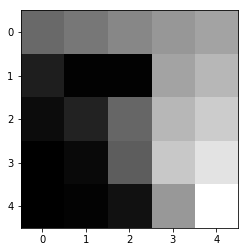

In [20]:
Q_new = np.zeros([5,5])

for i in range(5):
    for j in range(5):
        Q_new[i,j] = np.max(Q[i,j])
        
plt.imshow(Q_new,cmap='gray')
plt.show()

#### Efficient Eligibility Trace

In [24]:
class Node:
    def __init__(self, States= None, R=0,R_la = 0,Q=0,Next = None):
        self.State = States
        self.R= R
        self.Q = Q
        self.next = Next
        self.R_la = R_la

In [25]:
class Linklist:
    def __init__(self,head=None,tail=None):
        self.head = head
        self.tail = tail
        self.length = 0
    
    def insert(self,data):
        if not self.head:
            self.head = data
            self.tail = self.head
        else :
            self.tail.next = data
            self.tail = self.tail.next
        self.length = self.length + 1
    
    def delete(self):
        if self.head:
            if self.head == self.tail:
                self.head = None
                self.tail = None
            else:
                self.head = self.head.next
            
            self.length = self.length - 1
            
    def empty(self):
        if self.head == None and self.tail == None:
            return True

    def print_(self):
        temp = self.head
        while  temp:
            print(temp.State, end = "->")
            temp = temp.next

In [102]:
episode = 500
max_episode_length =500
Q = np.zeros([5,5,4])
E = np.zeros([5,5,4])
Q[4,4] = [100.,100.,100.,100.]
episode_with_ET_differalgo = []

In [103]:
max_size = int(-2/log10(lambda_return))
l_r = learning_rate
d_f = discount_factor
la_r = lambda_return

In [104]:
for j in range(episode):
    epsilon = 1 / (log10(j+1)+.1)
    
    S = observation(agent)
    A = np.argmax(Q[S[0],S[1]])
    
    M = Linklist()
    
    for i in range(max_episode_length):
        action(agent,A)
        
        R = rewards(agent)
        
        S_ = observation(agent)
        
        p = random.uniform(0,1)
        
        if p > epsilon:
            A_ = np.argmax(Q[S_[0],S_[1]])
        else :
            A_ = np.random.choice([0,1,2,3])
        
        #add probability to each action
        if A_ == 0:
            A_ = np.random.choice([0,1,2,3],p=[0.8,0,0.1,0.1])
        elif A_ == 1:
            A_ = np.random.choice([0,1,2,3],p=[0,0.8,0.1,0.1])
        elif A_ == 2:
            A_ = np.random.choice([0,1,2,3],p=[0.1,0.1,0.8,0])
        elif A_ == 3:
            A_ = np.random.choice([0,1,2,3],p=[0.1,0.1,0, 0.8])
            
       
        if S_[0] == 4 and S_[1] == 4:
            r = 100
            M.insert(Node(States=[S,A],R = r, Q=0))
            M.head.R_la = M.head.R_la + ((d_f*la_r)**(M.length-1))*(r)
            
            while not M.empty():
                nxt_state_r_la =  ((M.head.R_la - M.head.R)/(la_r*d_f) )-(((1-la_r)* M.head.Q)/(la_r))
                ST = M.head.State
                Q[ST[0][0],ST[0][1],ST[1]] = Q[ST[0][0],ST[0][1],ST[1]] + l_r * (M.head.R_la - Q[ST[0][0],ST[0][1],ST[1]]) 
                M.delete()
                if not M.empty():
                    M.head.R_la = nxt_state_r_la
            reset(agent)
            S = observation(agent)
            A = np.argmax(Q[S[0],S[1]])
            episode_with_ET_differalgo.append(i)
            break
        else :
            r = R + (d_f * (1 - l_r)* np.max(Q[S_[0],S_[1]]))
            M.insert(Node(States=[S,A],R = r, Q=np.max(Q[S_[0],S_[1]])))
            M.head.R_la = M.head.R_la + ((d_f*la_r)**(M.length-1))*(r)
            
            print(M.head.R_la)
            if M.length >= max_size:
                nxt_state_r_la = ((M.head.R_la - M.head.R)/(la_r*d_f))-(((1-la_r)* M.head.Q)/(la_r))
                ST = M.head.State
                Q[ST[0][0],ST[0][1],ST[1]] = Q[ST[0][0],ST[0][1],ST[1]] + l_r * (M.head.R_la - Q[ST[0][0],ST[0][1],ST[1]])
                M.delete()
                M.head.R_la = nxt_state_r_la
        
        S = S_
        A = A_
print("--- %s seconds ---" % (time.time() - start_time))   

-1.0
-1.45
-1.6524999999999999
-1.7436249999999998
-1.7846312499999997
-1.8030840624999998
-1.8030840624999995
-1.803084062499999
-1.803084062499998
-1.8030840624999955
-1.8030840624999902
-1.8030840624999782
-1.8030840624999516
-1.8030840624998925
-1.803084062499761
-1.803084062499469
-1.8030840624988203
-1.8030840624973783
-1.803084062494174
-1.8030840624870532
-1.8030840624712294
-1.8030840624360653
-1.803084062357923
-1.8030840621842732
-1.803084061798385
-1.8030840609408556
-1.8030840590352346
-1.8030840548005214
-1.8030840453900474
-1.8030840244778832
-1.8030839780064072
-1.8030838747364604
-1.8030836452476897
-1.8030831352726437
-1.803082001994764
-1.8030794835994755
-1.803073887165501
-1.8030614506455578
-1.803033813934573
-1.8029723990212734
-1.8028359214361631
-1.802532637913696
-1.8018586745304352
-1.8003609781231895
-1.7970327638848655
-1.7896367322441458
-1.7732011063758795
-1.7366774933352878
-1.6555139088006394
-1.4760211883580716
-1.076277675517937
-1.0
-1.45
-1.6524999

-1.1076364942029617e+100
-2.461414431560165e+100
-5.469809847911478e+100
-1.2155132995358943e+101
-2.7011406660077497e+101
-6.002534813350564e+101
-1.333896625226257e+102
-2.964214722724826e+102
-6.587143828277392e+102
-1.4638097396171789e+103
-3.2529105318066488e+103
-7.228690070681423e+103
-1.6063755711945692e+104
-3.569723491543485e+104
-7.932718870096633e+104
-1.7628264155770295e+105
-3.9173920346088243e+105
-8.705315632464053e+105
-1.9345145980460618e+106
-4.2989213289912485e+106
-9.55315852192349e+106
-2.122924117288403e+107
-4.717609149529784e+107
-1.0483575887843964e+108
-2.3296835068079313e+108
-5.17707445957318e+108
-1.150460988633856e+109
-2.5565800575532233e+109
-5.68128901678494e+109
-1.2625086703966539e+110
-2.8055748231417626e+110
-6.234610718092806e+110
-1.385469048465068e+111
-3.078819952218861e+111
-6.841822116041913e+111
-1.5204049146759798e+112
-3.378677588099333e+112
-7.5081724179985175e+112
-1.6684860389405653e+113
-3.707746753201256e+113
-8.239437229336125e+113
-

-3.966100375998901e+188
-8.813556391108668e+188
-1.9585680869130372e+189
-4.352373526473416e+189
-9.671941169940924e+189
-2.149320259986872e+190
-4.776267244415271e+190
-1.0613927209811713e+191
-2.3586504910692695e+191
-5.2414455357094874e+191
-1.1647656746021083e+192
-2.588368165782463e+192
-5.751929257294362e+192
-1.2782065016209693e+193
-2.8404588924910425e+193
-6.312133180472735e+193
-1.4026964931543163e+194
-3.117103548947745e+194
-6.926897006266475e+194
-1.5393104467835295e+195
-3.420689882687712e+195
-7.601528883054354e+195
-1.6892282195066278e+196
-3.753840066525735e+196
-8.341866393234862e+196
-1.8537480856580676e+197
-4.1194401886238045e+197
-9.154311488379271e+197
-2.0342914416893144e+198
-4.520647648198476e+198
-1.004588366266328e+199
-2.232418591702951e+199
-4.960930203784335e+199
-1.10242893413217e+200
-2.4498420758492666e+200
-5.444093501887259e+200
-1.2097985559749464e+201
-2.688441235499881e+201
-5.974313856666402e+201
-1.3276253014814226e+202
-2.9502784477364948e+202


KeyboardInterrupt: 

In [ ]:
start_time = time.time()
for j in range(episode):
    epsilon = 1 / (log10(j+1)+.1)
    
    S = observation(agent)
    A = np.argmax(Q[S[0],S[1]])
    
    M = Linklist()
    
    for i in range(max_episode_length):
        action(agent,A)
        
        R = rewards(agent)
        
        S_ = observation(agent)
        
        p = random.uniform(0,1)
        
        if p > epsilon:
            A_ = np.argmax(Q[S_[0],S_[1]])
        else :
            A_ = np.random.choice([0,1,2,3])
        
        #add probability to each action
        if A_ == 0:
            A_ = np.random.choice([0,1,2,3],p=[0.8,0,0.1,0.1])
        elif A_ == 1:
            A_ = np.random.choice([0,1,2,3],p=[0,0.8,0.1,0.1])
        elif A_ == 2:
            A_ = np.random.choice([0,1,2,3],p=[0.1,0.1,0.8,0])
        elif A_ == 3:
            A_ = np.random.choice([0,1,2,3],p=[0.1,0.1,0, 0.8])
            
       
        if S_[0] == 4 and S_[1] == 4:
            r = 100
            M.insert(Node(States=[S,A],R = r, Q=0))
            M.head.R_la = M.head.R_la + ((d_f)**(M.length-1))*(r)
            
            while not M.empty():
                nxt_state_r_la =  ((M.head.R_la - M.head.R)/(d_f))
                ST = M.head.State
                Q[ST[0][0],ST[0][1],ST[1]] = Q[ST[0][0],ST[0][1],ST[1]] + l_r * (M.head.R_la - Q[ST[0][0],ST[0][1],ST[1]]) 
                M.delete()
                if not M.empty():
                    M.head.R_la = nxt_state_r_la
            reset(agent)
            S = observation(agent)
            A = np.argmax(Q[S[0],S[1]])
            episode_with_n_step_return.append(i)
            break
        else :
            r = R 
            M.insert(Node(States=[S,A],R = r, Q=np.max(Q[S_[0],S_[1]])))
            M.head.R_la = M.head.R_la + (d_f**(M.length-1))*(r)
            
         
            if M.length >= max_size:
                nxt_state_r_la = ((M.head.R_la - M.head.R)/(d_f))
                ST = M.head.State
                M.head.R_la = M.head.R_la + (d_f**(M.length-1)) * M.tail.Q
                Q[ST[0][0],ST[0][1],ST[1]] = Q[ST[0][0],ST[0][1],ST[1]] + l_r * (M.head.R_la - Q[ST[0][0],ST[0][1],ST[1]])
                M.delete()
                M.head.R_la = nxt_state_r_la
        
        S = S_
        A = A_
print("--- %s seconds ---" % (time.time() - start_time))   

#### Grid world solved using n-step return

In [106]:
episode = 500
max_episode_length =500
Q = np.zeros([5,5,4])
E = np.zeros([5,5,4])
Q[4,4] = [100.,100.,100.,100.]
episode_with_n_step_return= []

In [107]:
n_step_return = 10
max_size = n_step_return
l_r = learning_rate
d_f = discount_factor
la_r = lambda_return

In [108]:
start_time = time.time()
for j in range(episode):
    epsilon = 1 / (log10(j+1)+.1)
    
    S = observation(agent)
    A = np.argmax(Q[S[0],S[1]])
    
    M = Linklist()
    
    for i in range(max_episode_length):
        action(agent,A)
        
        R = rewards(agent)
        
        S_ = observation(agent)
        
        p = random.uniform(0,1)
        
        if p > epsilon:
            A_ = np.argmax(Q[S_[0],S_[1]])
        else :
            A_ = np.random.choice([0,1,2,3])
        
        #add probability to each action
        if A_ == 0:
            A_ = np.random.choice([0,1,2,3],p=[0.8,0,0.1,0.1])
        elif A_ == 1:
            A_ = np.random.choice([0,1,2,3],p=[0,0.8,0.1,0.1])
        elif A_ == 2:
            A_ = np.random.choice([0,1,2,3],p=[0.1,0.1,0.8,0])
        elif A_ == 3:
            A_ = np.random.choice([0,1,2,3],p=[0.1,0.1,0, 0.8])
            
       
        if S_[0] == 4 and S_[1] == 4:
            r = 100
            M.insert(Node(States=[S,A],R = r, Q=0))
            M.head.R_la = M.head.R_la + ((d_f)**(M.length-1))*(r)
            
            while not M.empty():
                nxt_state_r_la =  ((M.head.R_la - M.head.R)/(d_f))
                ST = M.head.State
                Q[ST[0][0],ST[0][1],ST[1]] = Q[ST[0][0],ST[0][1],ST[1]] + l_r * (M.head.R_la - Q[ST[0][0],ST[0][1],ST[1]]) 
                M.delete()
                if not M.empty():
                    M.head.R_la = nxt_state_r_la
            reset(agent)
            S = observation(agent)
            A = np.argmax(Q[S[0],S[1]])
            episode_with_n_step_return.append(i)
            break
        else :
            r = R 
            M.insert(Node(States=[S,A],R = r, Q=np.max(Q[S_[0],S_[1]])))
            M.head.R_la = M.head.R_la + (d_f**(M.length-1))*(r)
            
         
            if M.length >= max_size:
                nxt_state_r_la = ((M.head.R_la - M.head.R)/(d_f))
                ST = M.head.State
                M.head.R_la = M.head.R_la + (d_f**(M.length-1)) * M.tail.Q
                Q[ST[0][0],ST[0][1],ST[1]] = Q[ST[0][0],ST[0][1],ST[1]] + l_r * (M.head.R_la - Q[ST[0][0],ST[0][1],ST[1]])
                M.delete()
                M.head.R_la = nxt_state_r_la
        
        S = S_
        A = A_
print("--- %s seconds ---" % (time.time() - start_time))   

--- 19.515389442443848 seconds ---


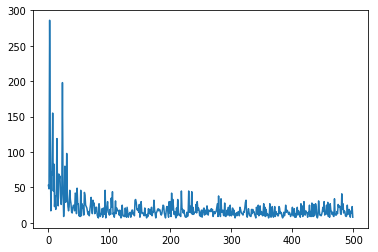

In [109]:
plt.plot(episode_with_n_step_return)
plt.show()

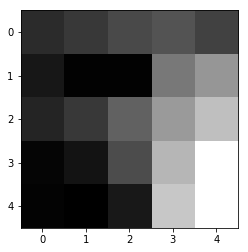

In [110]:
Q_new = np.zeros([5,5])

for i in range(5):
    for j in range(5):
        Q_new[i,j] = np.max(Q[i,j])
        
plt.imshow(Q_new,cmap='gray')
plt.show()

#### After 300 episode with 50 step in each episode using SARSAMAX

| Down | right| Down | right|  GOAL  |
|------|------|------|------|--------|
| right| right| right|  up  |   up   |
|------|------|------|------|--------|
|  up  |      | right|  up  |  left  |
|------|------|------|------|--------|
|  up  |      |  up  | left |   up   |
|------|------|------|------|--------|
|  up  | right|  up  | left |  left  |

In [36]:
win.close()

#### Compare both SARSA with Eligibility Trace and SARSA without Eligibility Traces, With ET learn faster than Without ET. 

In [394]:
maximum_size

43